In [31]:
from keras.datasets import imdb
print(type(imdb))
(train_data , train_labels),(test_data,test_labels) = imdb.load_data(num_words = 10000)

<class 'module'>


In [32]:
print(len(train_data))
print(train_labels[0])

25000
1


In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict( [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join( [reverse_word_index.get(i - 3, '?') for i in train_data[1]])

In [34]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [35]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [36]:
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

#Encoding the integer sequences into a binary matrix 

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers

model = models.Sequential() 
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [100]:

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 195us/step - loss: 0.1557 - acc: 0.7911 - val_loss: 0.1179 - val_acc: 0.8562
Epoch 2/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.0843 - acc: 0.9104 - val_loss: 0.0987 - val_acc: 0.8711
Epoch 3/20
15000/15000 [==============================] - 2s 160us/step - loss: 0.0630 - acc: 0.9329 - val_loss: 0.0942 - val_acc: 0.8758
Epoch 4/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.0505 - acc: 0.9492 - val_loss: 0.0864 - val_acc: 0.8834
Epoch 5/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.0413 - acc: 0.9585 - val_loss: 0.0868 - val_acc: 0.8835
Epoch 6/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.0350 - acc: 0.9680 - val_loss: 0.0843 - val_acc: 0.8843
Epoch 7/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.0298 - acc: 0.9727 - val_loss: 0.0853 - 

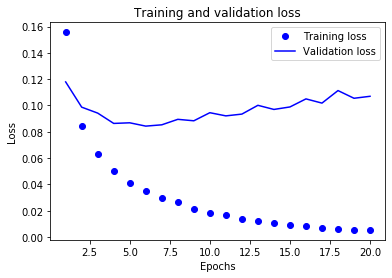

In [101]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1,len(acc) +1 )

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#OverFitting

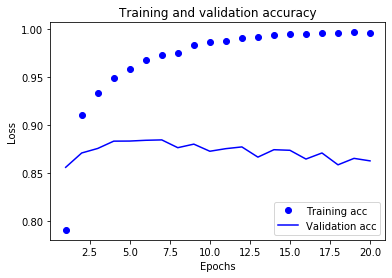

In [102]:
plt.clf()
acc_values = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#OverFitting

In [81]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 129us/step - loss: 0.4566 - acc: 0.8199
Epoch 2/4
25000/25000 [==============================] - 3s 115us/step - loss: 0.2624 - acc: 0.9110
Epoch 3/4
25000/25000 [==============================] - 3s 113us/step - loss: 0.2029 - acc: 0.9268
Epoch 4/4
25000/25000 [==============================] - 6s 250us/step


In [82]:
results

[0.300402461180687, 0.88016]

In [83]:
model.predict(x_test)

array([[0.272626  ],
       [0.9999428 ],
       [0.9594258 ],
       ...,
       [0.19746801],
       [0.11714831],
       [0.70058787]], dtype=float32)